<a href="https://colab.research.google.com/github/rafymemon/ML_Projects/blob/main/end_to_end_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info() #indicate the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


Steps we will perform:
1. Preprocess + EDA + Feature Selection
2. Extract Input and Output coloumns
3. Scale the value
4. Train test split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

In [ ]:
# Step 01 : Preprocessing + EDA + Feature Selection
df = df.iloc[:,1:] # deleting the 1st coloumn as it is of no use

In [ ]:
print(df)

    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


In [ ]:
#EDA
import matplotlib.pyplot as plt


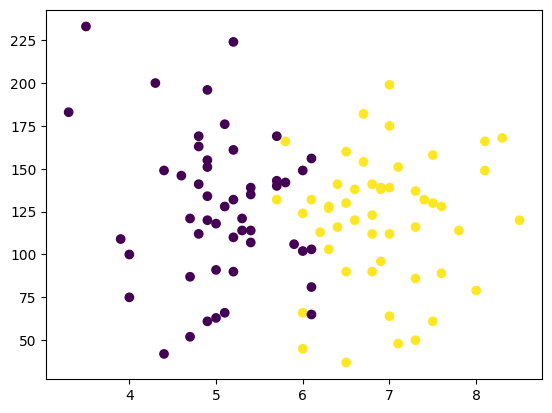

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement']) # Yellow color shows the students applicable for placements

In [ ]:
# Step 02 : Extracting input and output coloumns
X = df.iloc[:, 0:2] # Input coloumns/independent
y = df.iloc[:, -1] # output coloumn/dependent coloumn

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
X.shape #2D tensor

(100, 2)

In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
y.shape #1D tensor

(100,)

In [ ]:
# Step 04 : Test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train

,cgpa,iq
46,5.3,114.0
4,5.8,142.0
37,8.1,149.0
44,7.5,61.0
72,7.3,116.0
...,...,...
86,5.1,128.0
33,6.0,149.0
81,5.4,107.0
26,7.0,199.0


In [ ]:
y_train

,placement
46,0
4,0
37,1
44,1
72,1
...,...
86,0
33,0
81,0
26,1


In [ ]:
X_test

,cgpa,iq
80,4.9,196.0
30,7.6,128.0
22,4.9,120.0
64,7.0,64.0
91,7.5,158.0
10,6.0,45.0
58,8.0,79.0
20,6.6,120.0
29,7.0,112.0
25,5.0,91.0


In [ ]:
y_test

,placement
80,0
30,1
22,0
64,1
91,1
10,1
58,1
20,1
29,1
25,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.56722374, -0.27908291],
       [-0.12408019,  0.43491601],
       [ 1.91438013,  0.61341574],
       [ 1.38260787, -1.63058087],
       [ 1.20535045, -0.22808299],
       [-1.01036729,  0.40941605],
       [-0.2127089 ,  0.1799164 ],
       [-1.36488213,  0.61341574],
       [ 0.40769206,  0.40941605],
       [-1.01036729,  1.12341497],
       [-1.71939697, -0.63608237],
       [-0.74448116, -1.50308107],
       [-0.92173858,  0.23091632],
       [-1.098996  , -0.96758187],
       [-1.01036729,  0.9704152 ],
       [ 0.49632077, -2.24257995],
       [-0.92173858,  0.76641551],
       [-0.12408019,  1.04691509],
       [-1.45351084,  1.91391378],
       [ 0.49632077,  0.89391532],
       [ 0.14180594,  0.79191547],
       [ 0.14180594,  0.1799164 ],
       [-1.71939697, -1.27358141],
       [ 0.67357819,  1.45491447],
       [-1.18762471,  0.53691586],
       [ 0.05317723, -1.50308107],
       [ 0.14180594, -1.52858103],
       [ 0.85083561, -0.73808222],
       [-0.83310987,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[-0.92173858,  1.81191393],
       [ 1.47123658,  0.07791655],
       [-0.92173858, -0.12608314],
       [ 0.93946432, -1.55408099],
       [ 1.38260787,  0.84291539],
       [ 0.05317723, -2.03858026],
       [ 1.82575142, -1.17158157],
       [ 0.58494948, -0.12608314],
       [ 0.93946432, -0.33008284],
       [-0.83310987, -0.86558203]])

In [ ]:
# Step 05 : Train the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
# Model Training
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Step 06 : Model Evaluation
y_predict = clf.predict(X_test)

In [ ]:
y_test

,placement
80,0
30,1
22,0
64,1
91,1
10,1
58,1
20,1
29,1
25,0


In [ ]:
# Finding the accuracy of the trained model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

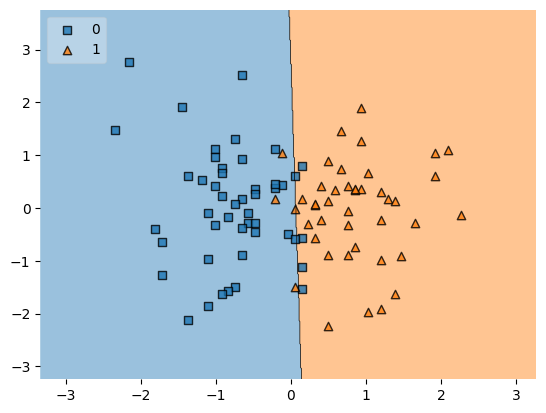

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))